Testing FeaturePointManager and new OpticalFlowTracker

In [1]:
import cv2
import numpy as np
import sys
sys.path.append('../')
from project.trackers import FeaturePointManager, NewOpticalFlowTracker
from utils import imshow

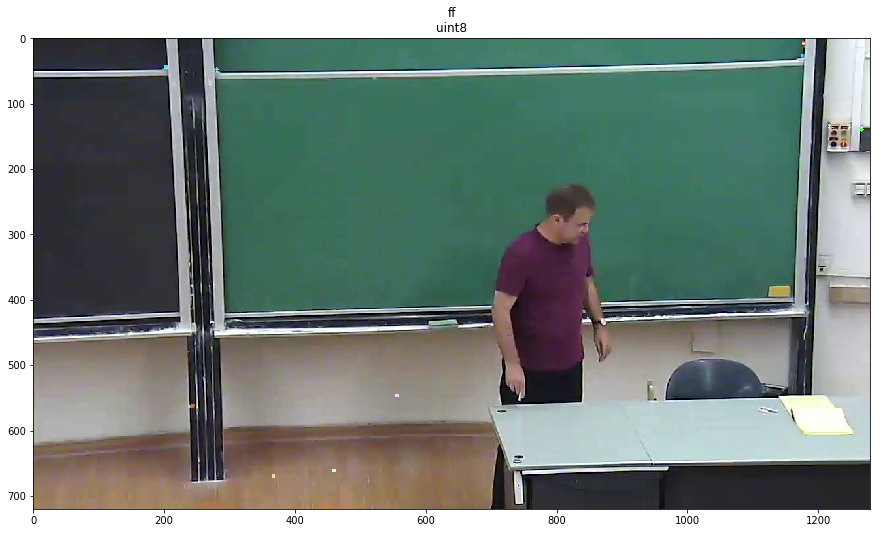

(15, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)
(12, 1, 2)

In [4]:
cap = cv2.VideoCapture('../lecture.mp4')
for _ in range(120):
    cap.grab()
    
_, old_frame = cap.read()
old_frame_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
corner_mask = np.zeros(old_frame.shape[:2], dtype='uint8')
corner_mask[:150,:] = 255
FeaturePointManager.generate_points_for_frame(old_frame_gray, mask=corner_mask)
mask = np.zeros_like(old_frame)
FeaturePointManager.draw_points_on_frame(mask)
imshow('ff', cv2.add(old_frame, mask), size=15)
tr = NewOpticalFlowTracker(old_frame_gray)

while 1:
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    h = tr.find_homography(frame_gray)
    if h is not None:
        FeaturePointManager.apply_homography(h, frame_gray, only_non_visible_points=True)
        # Use homography
        height, width, channels = frame.shape
        warped = cv2.warpPerspective(old_frame, h, (width, height))
        cv2.imshow('aligned', cv2.addWeighted(frame,.5,warped,.5,0))
    mask = np.zeros_like(frame)
    FeaturePointManager.draw_points_on_frame(mask)
    cv2.imshow('cam', cv2.add(frame, mask))
    old_frame = frame
    old_frame_gray = frame_gray
    
    k = cv2.waitKey(100) & 0xff
    if k == 27:
        break
    
cv2.destroyAllWindows()
cap.release()